In [1]:
import vtk
from vtk.util import numpy_support
import os
import numpy
from matplotlib import pyplot, cm
import cv2 as cv
from skimage import color
from skimage import io
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
PathDicom = "./Fig1B-C/"
reader = vtk.vtkDICOMImageReader()
reader.SetDirectoryName(PathDicom)
reader.Update()

In [3]:
# Load dimensions using `GetDataExtent`
_extent = reader.GetDataExtent()
ConstPixelDims = [_extent[1]-_extent[0]+1, _extent[3]-_extent[2]+1, _extent[5]-_extent[4]+1]

# Load spacing values
ConstPixelSpacing = reader.GetPixelSpacing()

In [4]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [5]:
# Get the 'vtkImageData' object from the reader
imageData = reader.GetOutput()
# Get the 'vtkPointData' object from the 'vtkImageData' object
pointData = imageData.GetPointData()
# Ensure that only one array exists within the 'vtkPointData' object
assert (pointData.GetNumberOfArrays()==1)
# Get the `vtkArray` (or whatever derived type) which is needed for the `numpy_support.vtk_to_numpy` function
arrayData = pointData.GetArray(0)

# Convert the `vtkArray` to a NumPy array
ArrayDicom = numpy_support.vtk_to_numpy(arrayData)
# Reshape the NumPy array to 3D using 'ConstPixelDims' as a 'shape'
ArrayDicom = ArrayDicom.reshape(ConstPixelDims, order='F')


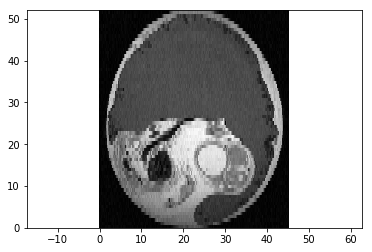

In [6]:
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, z, numpy.flipud(numpy.rot90(ArrayDicom[:, 140, :])))
pylab.savefig('foo.png')

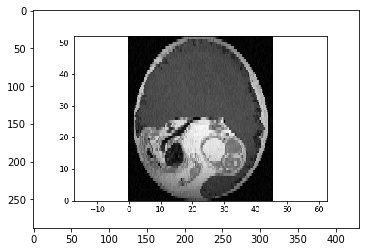

In [7]:
img2 = color.rgb2gray(io.imread('foo.png'))
plt.imshow(img2)

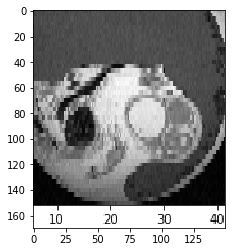

In [8]:
img4 = cv.imread('foo.png')
crop_img = img4[100:270, 150:300]
plt.imshow(crop_img)
pylab.savefig('foo2.png')

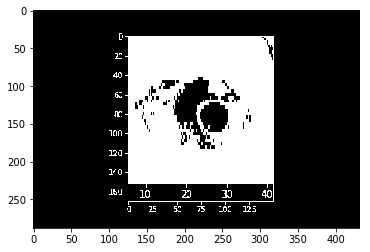

In [18]:
img = cv.imread('foo2.png',0)
ret,thresh4 = cv.threshold(img,190,255,cv.THRESH_BINARY_INV)

plt.imshow(thresh4)
pylab.savefig('foo3.png')

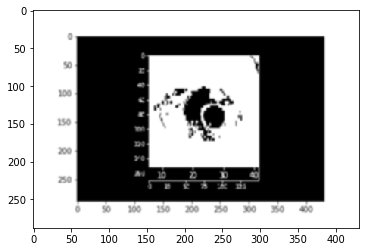

In [16]:
img = cv.imread('foo3.png')
blur = cv.GaussianBlur(img,(5,5),0)
plt.imshow(blur)
pylab.savefig('foo4.png')

In [39]:
img4 = cv.imread('foo4.png')
crop_img = img4[100:200, 150:300]
pylab.savefig('foo5.png')

<Figure size 432x288 with 0 Axes>

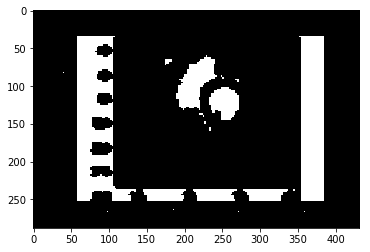

In [28]:
img = cv.imread('foo5.png', 0)
ret, thresh4 = cv.threshold(img,5,255,cv.THRESH_BINARY_INV)
plt.imshow(thresh4)
pylab.savefig('foo6.png')

In [37]:
img = cv.imread('foo6.png')
blur = cv.GaussianBlur(img,(5,5),0)
pylab.savefig('foo7.png')

<Figure size 432x288 with 0 Axes>

In [38]:
img = cv.imread('foo7.png', 0)
ret, thresh4 = cv.threshold(img,5,255,cv.THRESH_BINARY_INV)
pylab.savefig('foo8.png')

<Figure size 432x288 with 0 Axes>

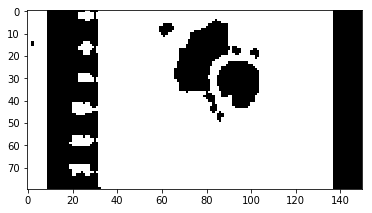

In [34]:
img4 = cv.imread('foo8.png')
crop_img = img4[100:180, 150:300]
plt.imshow(crop_img)
pylab.savefig('foo9.png')

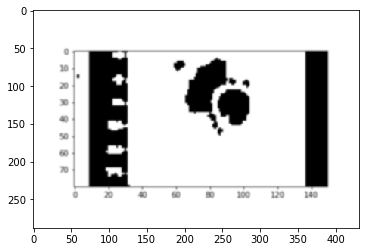

In [35]:
img = cv.imread('foo9.png')
blur = cv.GaussianBlur(img,(5,5),0)
plt.imshow(blur)
pylab.savefig('foo10.png')